In [2]:
import json
import requests
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt  

import sklearn
from sklearn import preprocessing
from sklearn import linear_model, metrics, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score


In [1]:
def get_df(start_year,end_year):

    years = [x for x in range(start_year,end_year+1)]
    url = f'https://www.basketball-reference.com/leagues/NBA_{years[0]}_per_game.html'
    df = pd.read_html(url,header=0)[0]
    
    for year in years[2:]:
        url = f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'
        curr_df = pd.read_html(url,header=0)[0]
        df = pd.concat([df,curr_df])

    return df


In [3]:
nba_df = get_df(2005,2020)

In [4]:
nba_df.to_csv('nba_df.csv',index=False)

# Work on CSV

In [59]:
nba_df = pd.read_csv('nba_df.csv')
nba_df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Shareef Abdur-Rahim,PF,28,POR,54,49,34.6,6.2,12.4,...,.866,2.3,5.0,7.3,2.1,0.9,0.5,2.2,2.8,16.8
1,2,Cory Alexander,SG,31,CHA,16,1,12.6,1.0,3.1,...,.750,0.5,1.3,1.8,2.3,0.6,0.1,1.2,1.8,3.1
2,3,Malik Allen,PF,26,TOT,36,1,14.4,2.3,4.9,...,.929,1.1,1.6,2.8,0.5,0.3,0.6,0.5,1.5,5.4
3,3,Malik Allen,PF,26,MIA,14,0,17.7,2.5,5.4,...,.929,1.7,2.0,3.7,0.8,0.3,0.8,0.8,2.1,5.9
4,3,Malik Allen,PF,26,CHA,22,1,12.3,2.2,4.6,...,.929,0.7,1.4,2.1,0.3,0.2,0.5,0.3,1.1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
9411,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
9412,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
9413,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,...,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


# Data Cleaning

In [60]:
nba_df.reset_index(inplace=True)
del nba_df['index']
del nba_df['Rk']
del nba_df['Tm']
nba_df.dropna(axis=0)

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Shareef Abdur-Rahim,PF,28,54,49,34.6,6.2,12.4,.503,0.3,...,.866,2.3,5.0,7.3,2.1,0.9,0.5,2.2,2.8,16.8
1,Cory Alexander,SG,31,16,1,12.6,1.0,3.1,.327,0.5,...,.750,0.5,1.3,1.8,2.3,0.6,0.1,1.2,1.8,3.1
5,Ray Allen*,SG,29,78,78,39.3,8.2,19.2,.428,2.7,...,.883,1.0,3.4,4.4,3.7,1.1,0.1,2.2,2.1,23.9
6,Tony Allen,SG,23,77,34,16.4,2.4,5.0,.475,0.2,...,.737,1.1,1.8,2.9,0.8,1.0,0.3,1.0,2.0,6.4
7,Rafer Alston,PG,28,80,78,34.0,5.0,12.2,.414,1.7,...,.740,0.5,3.0,3.5,6.4,1.5,0.1,2.1,2.7,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,Justin Wright-Foreman,PG,22,4,0,11.3,1.8,5.0,.350,0.5,...,.750,0.0,1.3,1.3,1.8,0.5,0.0,0.8,1.3,4.8
9409,Thaddeus Young,PF,31,64,16,24.9,4.2,9.4,.448,1.2,...,.583,1.5,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3
9410,Trae Young,PG,21,60,60,35.3,9.1,20.8,.437,3.4,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
9411,Cody Zeller,C,27,58,39,23.1,4.3,8.3,.524,0.3,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1


In [61]:
nba_df = nba_df[nba_df.Player != "Player"] ## Remove rows with shitty data

cols = nba_df.columns.drop(['Player','Pos']) 

nba_df[cols] = nba_df[cols].apply(pd.to_numeric) ## Change cols to numeric

nba_df['Player'] = nba_df['Player'].str.replace('*','',regex=True) ## Remove '*' from player names


nba_df.nlargest(15,['PTS'])




/home/avitay18/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
8281,James Harden,PG,29,78,78,36.8,10.8,24.5,0.442,4.8,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1
9004,James Harden,SG,30,68,68,36.5,9.9,22.3,0.444,4.4,...,0.865,1.0,5.5,6.6,7.5,1.8,0.9,4.5,3.3,34.3
4975,Kevin Durant,SF,25,81,81,38.5,10.5,20.8,0.503,2.4,...,0.873,0.7,6.7,7.4,5.5,1.3,0.7,3.5,2.1,32.0
680,Kobe Bryant,SG,28,77,77,40.8,10.6,22.8,0.463,1.8,...,0.868,1.0,4.7,5.7,5.4,1.4,0.5,3.3,2.7,31.6
7275,Russell Westbrook,PG,28,81,81,34.6,10.2,24.0,0.425,2.5,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
838,Allen Iverson,PG,31,15,15,42.7,10.1,24.4,0.413,0.8,...,0.885,0.5,2.3,2.7,7.3,2.2,0.1,4.4,1.4,31.2
264,Allen Iverson,PG,29,75,75,42.3,10.3,24.2,0.424,1.4,...,0.835,0.7,3.3,4.0,7.9,2.4,0.1,4.6,1.9,30.7
8779,Bradley Beal,SG,26,57,57,36.0,10.4,22.9,0.455,3.0,...,0.842,0.9,3.3,4.2,6.1,1.2,0.4,3.4,2.2,30.5
7555,James Harden,SG,28,72,72,35.4,9.0,20.1,0.449,3.7,...,0.858,0.6,4.8,5.4,8.8,1.8,0.7,4.4,2.3,30.4
2321,Dwyane Wade,SG,27,79,79,38.6,10.8,22.0,0.491,1.1,...,0.765,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3,30.2


<AxesSubplot:xlabel='Age', ylabel='PTS'>

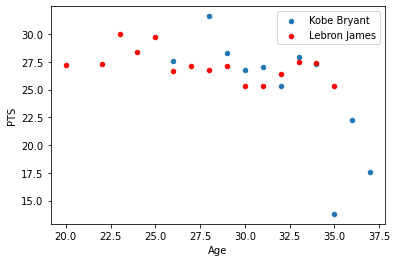

In [62]:

## AVG of PTS per season, per Age

lebron = nba_df.loc[(nba_df.Player == 'LeBron James')]
kobe = nba_df.loc[(nba_df.Player == 'Kobe Bryant')]

ax = kobe.plot.scatter(x='Age',y='PTS',label='Kobe Bryant')
lebron.plot.scatter(x='Age',y='PTS',c='red',ax=ax,label='Lebron James')



In [63]:
## Get top 15 PTS, drop duplicate players and get 5 top of the remaining
top_pts = nba_df.nlargest(15,'PTS').drop_duplicates(subset='Player').nlargest(5,'PTS')
top_pts.head()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
8281,James Harden,PG,29,78,78,36.8,10.8,24.5,0.442,4.8,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1
4975,Kevin Durant,SF,25,81,81,38.5,10.5,20.8,0.503,2.4,...,0.873,0.7,6.7,7.4,5.5,1.3,0.7,3.5,2.1,32.0
680,Kobe Bryant,SG,28,77,77,40.8,10.6,22.8,0.463,1.8,...,0.868,1.0,4.7,5.7,5.4,1.4,0.5,3.3,2.7,31.6
7275,Russell Westbrook,PG,28,81,81,34.6,10.2,24.0,0.425,2.5,...,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6
838,Allen Iverson,PG,31,15,15,42.7,10.1,24.4,0.413,0.8,...,0.885,0.5,2.3,2.7,7.3,2.2,0.1,4.4,1.4,31.2


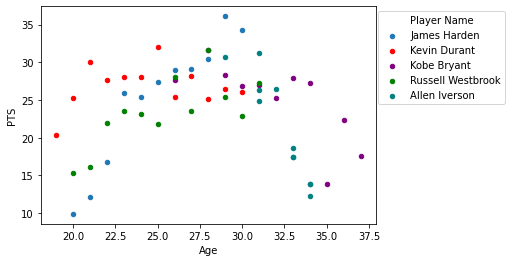

In [64]:
players = top_pts['Player'].tolist()
first_plt = nba_df.loc[(nba_df.Player == players[0])]
ax = first_plt.plot.scatter(x='Age',y='PTS',label=players[0])
# ax = first_plt.plot(kind='line',x='Age',y='PTS',label=players[0])
colors = ['red','purple','green','teal']
for i,name in enumerate(players[1:],0):
    curr_df = nba_df.loc[(nba_df.Player == name)]
    curr_df.plot.scatter(x='Age',y='PTS',ax=ax,c=colors[i],label=name)
    # curr_df.plot(x='Age',y='PTS',ax=ax,c=colors[i],label=name)
plt.legend(title='Player Name',bbox_to_anchor=(1.4, 1),loc='upper right')

In [65]:
nba_df

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Shareef Abdur-Rahim,PF,28,54,49,34.6,6.2,12.4,0.503,0.3,...,0.866,2.3,5.0,7.3,2.1,0.9,0.5,2.2,2.8,16.8
1,Cory Alexander,SG,31,16,1,12.6,1.0,3.1,0.327,0.5,...,0.750,0.5,1.3,1.8,2.3,0.6,0.1,1.2,1.8,3.1
2,Malik Allen,PF,26,36,1,14.4,2.3,4.9,0.475,0.0,...,0.929,1.1,1.6,2.8,0.5,0.3,0.6,0.5,1.5,5.4
3,Malik Allen,PF,26,14,0,17.7,2.5,5.4,0.461,0.0,...,0.929,1.7,2.0,3.7,0.8,0.3,0.8,0.8,2.1,5.9
4,Malik Allen,PF,26,22,1,12.3,2.2,4.6,0.485,0.0,...,0.929,0.7,1.4,2.1,0.3,0.2,0.5,0.3,1.1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,Trae Young,PG,21,60,60,35.3,9.1,20.8,0.437,3.4,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
9411,Cody Zeller,C,27,58,39,23.1,4.3,8.3,0.524,0.3,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
9412,Tyler Zeller,C,30,2,0,2.0,0.5,2.0,0.250,0.0,...,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
9413,Ante Žižić,C,23,22,0,10.0,1.9,3.3,0.569,0.0,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [66]:
le = preprocessing.LabelEncoder()
pos = le.fit_transform(nba_df['Pos'])
player = le.fit_transform(nba_df['Player'])
nba_df = nba_df.drop("Pos", axis='columns')
nba_df = nba_df.drop("Player", axis='columns')
nba_df["Player"]=player
nba_df['Pos']=pos
nba_df

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player,Pos
0,28,54,49,34.6,6.2,12.4,0.503,0.3,0.7,0.385,...,5.0,7.3,2.1,0.9,0.5,2.2,2.8,16.8,1443,2
1,31,16,1,12.6,1.0,3.1,0.327,0.5,1.2,0.421,...,1.3,1.8,2.3,0.6,0.1,1.2,1.8,3.1,292,11
2,26,36,1,14.4,2.3,4.9,0.475,0.0,0.0,NaN,...,1.6,2.8,0.5,0.3,0.6,0.5,1.5,5.4,1056,2
3,26,14,0,17.7,2.5,5.4,0.461,0.0,0.0,NaN,...,2.0,3.7,0.8,0.3,0.8,0.8,2.1,5.9,1056,2
4,26,22,1,12.3,2.2,4.6,0.485,0.0,0.0,NaN,...,1.4,2.1,0.3,0.2,0.5,0.3,1.1,5.0,1056,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,21,60,60,35.3,9.1,20.8,0.437,3.4,9.5,0.361,...,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,1556,5
9411,27,58,39,23.1,4.3,8.3,0.524,0.3,1.3,0.240,...,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,285,0
9412,30,2,0,2.0,0.5,2.0,0.250,0.0,0.0,NaN,...,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1595,0
9413,23,22,0,10.0,1.9,3.3,0.569,0.0,0.0,NaN,...,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,86,0


In [67]:
three = le.fit_transform(nba_df['3P%'])
free = le.fit_transform(nba_df['FT%'])
three
free
nba_df = nba_df.drop("3P%", axis='columns')
nba_df = nba_df.drop("FT%", axis='columns')
nba_df["3P%"]=three
nba_df['FT%']=free
field = le.fit_transform(nba_df['FG%'])
nba_df = nba_df.drop("FG%", axis='columns')
nba_df['FG%']=field
two = le.fit_transform(nba_df['2P%'])
nba_df = nba_df.drop("2P%", axis='columns')
nba_df['2P%']=two
efield = le.fit_transform(nba_df['eFG%'])
nba_df = nba_df.drop("eFG%", axis='columns')
nba_df['eFG%']=efield


In [70]:
nba_df

,Age,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,...,TOV,PF,PTS,Player,Pos,3P%,FT%,FG%,2P%,eFG%
0,28,54,49,34.6,6.2,12.4,0.3,0.7,6.0,11.7,...,2.2,2.8,16.8,1443,2,248,489,281,250,276
1,31,16,1,12.6,1.0,3.1,0.5,1.2,0.5,1.9,...,1.2,1.8,3.1,292,11,284,373,106,30,170
2,26,36,1,14.4,2.3,4.9,0.0,0.0,2.3,4.9,...,0.5,1.5,5.4,1056,2,384,551,253,215,237
3,26,14,0,17.7,2.5,5.4,0.0,0.0,2.5,5.4,...,0.8,2.1,5.9,1056,2,384,551,239,201,223
4,26,22,1,12.3,2.2,4.6,0.0,0.0,2.2,4.6,...,0.3,1.1,5.0,1056,2,384,551,263,225,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,21,60,60,35.3,9.1,20.8,3.4,9.5,5.7,11.4,...,4.8,1.7,29.6,1556,5,224,483,215,241,281
9411,27,58,39,23.1,4.3,8.3,0.3,1.3,4.0,7.0,...,1.3,2.4,11.1,285,0,105,305,302,317,305
9412,30,2,0,2.0,0.5,2.0,0.0,0.0,0.5,2.0,...,0.0,0.0,1.0,1595,0,384,574,41,25,36
9413,23,22,0,10.0,1.9,3.3,0.0,0.0,1.9,3.3,...,0.5,1.2,4.4,86,0,384,360,347,309,331


In [68]:

def split_df(df,target_column):
    dfx = df.copy()
    dfy=dfx[target_column]
    del dfx[target_column]
    return dfx,dfy

def train_1st_model(X_train, y_train):
    return linear_model.LinearRegression().fit(X_train,y_train)

def predict_1st(trained_1st_model, X_test):
    return trained_1st_model.predict(X_test)   

def evaluate_performance_1st(y_test,y_predicted):
    return r2_score(y_test,y_predicted)    

In [69]:
x_train,y_train = split_df(nba_df,'PTS')
x_test,y_test = split_df(nba_df,'PTS')
trained_model = train_1st_model(x_train,y_train)
predicted_model = predict_1st(trained_model,x_test)
y_pred=pd.Series(predicted_model,index=x_test.index)
eval_result=evaluate_performance_1st(y_test,y_pred)
eval_result


0.9998470097562856